In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Time Series Analysis

### 시계열 자료
* 시계열(time-series)은 **시간의 순서에 따라**, 기록된 이렬의 데이터 점
* 대부분 **연속된 동일한 시간 간격**에서 측정된 수열이다.
* 예시로는 파도의 높이, 태양 흑점의 수, 주식의 일일 종가 등

### 시계열 분석
#### 목표
* 시계열 분석은 데이터로부터 의미있는 통계 또는 특징을 추출하여 **미래의 값을 예측**
* 시계열분석은 단일 시계열 또는 서로 다른 시점에서 종속된 시계열 값을 비교하는데 초점이 있다.
* 시계열 자료의 특성인
    1. 정상성(stationary) -> 과거와 미래가 확률적으로 동일하다! 라는 느낌 (패턴말고 "확률"이 동일!)
    > 예를 들어 평균이 일정하여 분산이 존재하는데 상수이고 두 시점 사이의 자기 공분산은 시차에만 의존한다.<p>
    > 공분산 : $ Cov(X,Y) = E[[(X-E(X)][Y-E(Y)]]$ -> 2개의 확률변수의 선형관계의 정도를 나타낸것.<p>
    > 자기공분산 : 서로 다른 2개의 시간에 대한 변수의 공분산 -> 시점 1: $T_1$과 시점 2: $T_2$의 관계의 정도 -> 추후에 더 상세히 설명
    2. 비정상성(non-stationary)
    3. 계절성(Seasonal)
    4. 추세(Trend)
* 특성들을 분석하여 적절하게 모델링을 한다.

### 1.1 시계열 분석의 개념

#### 시계열 자료와 시계열 분석
* 시계열 자료: 동일한 시간간격(fixed time interval)으로 이루어진 벡터로싸, 특징은 시계열 자료들이 **독립이 아니라** 상호연관 되어 있다.
    * 이산시계열(discrete time series): 일정한 시간 간격에 따라 생성 ex) 주가(분, 시간) -> 이놈을 주로 본다.
    * 연속시계열(continuous time series): ex) 주가(tick)
    > "Sampling" a continuous time series laeds to a distcrete time series. <p>
    > Time Series data are usually not independent, especially if sampling interval is **small**.
* 시점 $t_1, t_2, t_3,...,t_n$에서 관측된 이산 시계열을 $Y_1, Y_2, Y_3,...,Y_n$이라 하자.


#### 시계열 분석의 목적
1. Modeling : 시계열 자료의 구조(계절성, trend) 파악
2. Forecasting : (예측) 분석대상을 시계열자료의 구조와 특성을 토대로 미래 예측
3. Control : 생성된 시스템(Model)을 제어(Testing)

* **시계열자료의 특성: 서로 Correlated**

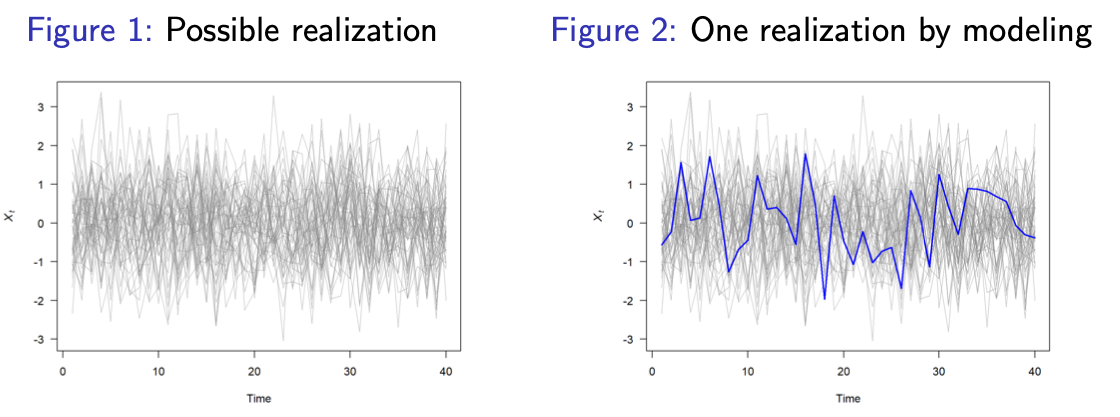

In [1]:
from IPython import display
display.Image("../image/1-1.png")

#### Types of TS data
* Univariate - single series
* Multivariate - two or more series(vector time series)
* Time interval - yearly, monthly, weekly, daily, minute,.... every k nanonseconds...

#### Resons for Analying Time Series
* Description of features (level(mean), trend, cycles,....)
* Prediction
* Explanation Explanatory variables; Caues and effect Granger causility

#### 시계열 분석의 절차

1. 시계열자료를 적합시킬 수 있는 이론적인 수학적 모형 선택
2. 모형의 모수를 추정
3. 자료의 적합성 검토 by 잔차분석 등등
4. 만족할만한 모형이 발견되었다면
5. 미레의 값 예측

#### 시계열 분석의 주요한 3가지 개념
1. 추세(Trend)
2. 연속 의존성(seriel dependence)
3. 정상성(stationary)

### 1.2 시계열 자료의 형태


#### 1. Random Variation Time Series

* 시계열 자료가 일정 수준에 머무르면서
* 우연변동(Random variation) 또는 기저변동(Underlying variation)에 의한 변화만 나타나는 경우
*  $ Y_t = α + e_t ,  e_t \sim N(0,σ^2)$

In [10]:
import Module_1 as M_1

M_1.plot_random_variation_time_series(alpha=0, length=50, noise_std=0.8, seed=42)

#### 2. Seasonal Variation Time Series
* 주기적 셩격의 계절성 변동에 의한 요인, 주기적 변화를 나타내는 형태
*  $f$:주기 ,$S_t$:계절변동, $\alpha, \beta$:미지의 모수
* $ y_t = S_t + e_t$
* $y_t = \alpha
     + \beta_1 \sin\!\Bigl(\tfrac{2\pi t}{f}\Bigr)
     + \beta \cos\!\Bigl(\tfrac{2\pi t}{f}\Bigr)
     + e_t$

In [8]:
M_1.plot_seasonal_time_series(alpha=2, beta1=3, beta=2, f=12, length=100, noise_std=0.5, seed=42)

#### 3. Trend Variation Time Series
* 시간에 따라 증가하거나 또는 감소하는 형태
* $T_t$:추세변동
* $Y_t = T_t + e_t$
* $Y_t = α + βt + e_t$

In [12]:
M_1.plot_trend_time_series(alpha=5, beta=0.5, length=50, noise_std=2.0, seed=42)

* Trend Variation Time Series와 같은 경우 시계열자료에서 Trend를 빼주고 Random variation이나 Seasonal model로 분석을 진행한다.
*  위의 형태의 시계열을 혼합한 계절적 추세변동 시계열, 순환 시계열도 있다.